# 8 Steps Of Machine Learning
* Data Gathering
* Data pre-processing
* Feature Engineering
* Choosing Model
* Training Model
* Test Model/ Model Evaluation
* Parameter Tuning
* Prediction


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB
<cla

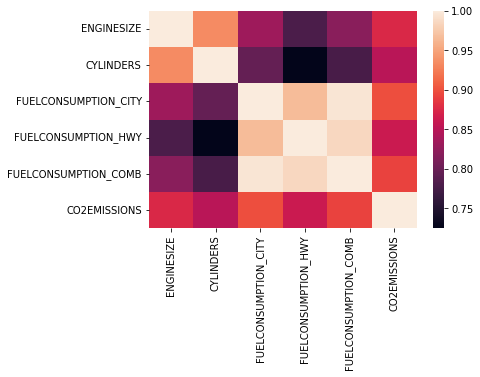

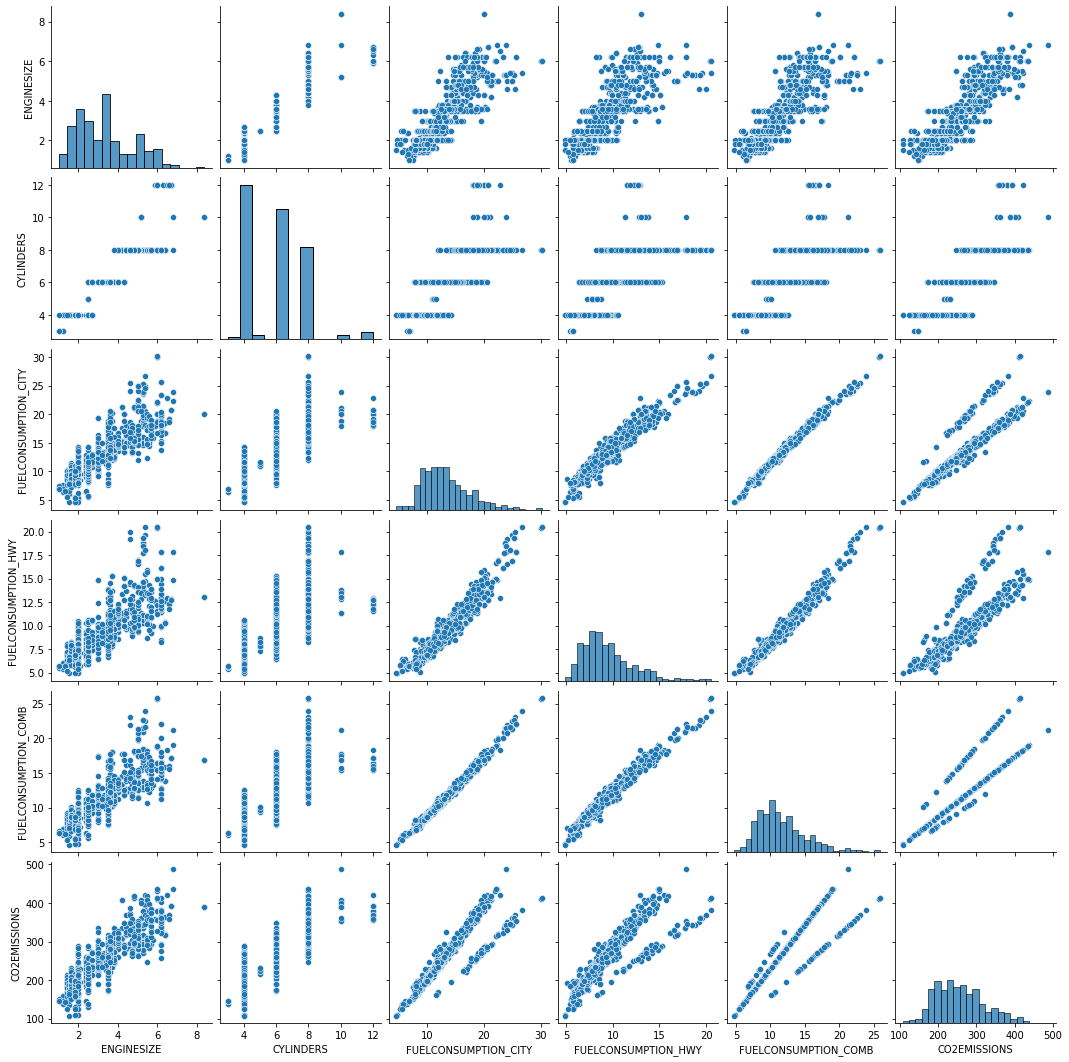

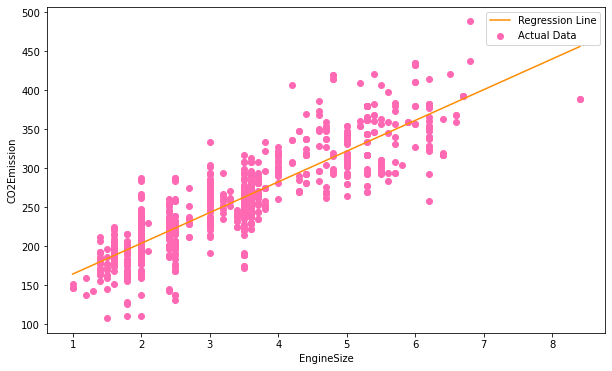

In [8]:
# Data Gathering
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn import model_selection
import seaborn as sns
df = pd.read_csv("FuelConsumption.csv")
df.head()
df.describe()

#data Pre-Processing
df.info()
data = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY",
           "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
data.info()

## Feature
corr = data.corr()
sns.heatmap(corr)
sns.pairplot(data)

## Split data into training and test set
X = data[["ENGINESIZE"]]
Y = data[["CO2EMISSIONS"]]
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=1)

## Choosing Model

#Init
model = linear_model.LinearRegression()

## Train Model
model.fit(xtrain, ytrain)
print(model.score(xtrain, ytrain))

## Predict/Test
yhat = model.predict(xtest)

## Metrics
print("MSE: ", mean_squared_error(yhat, ytest))
print("R2 Score: ", r2_score(yhat, ytest))

## Regression Analyssis
line = np.linspace(1, 8.4, 853).reshape(-1, 1)
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
axes.scatter(xtrain, ytrain, label="Actual Data", c="hotpink")
axes.plot(line, model.predict(line), label="Regression Line", c="darkorange")
axes.legend()
axes.set_xlabel("EngineSize")
axes.set_ylabel("CO2Emission")
plt.show()
